<a href="https://colab.research.google.com/github/aryanxp/ANN-Project/blob/main/Admission_Prediction_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd
import numpy as np

data = pd.read_csv('Admission.csv')
data=data.drop(columns=['Serial No.'])

In [46]:
data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission Chance
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [47]:
data.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Admission Chance     0
dtype: int64

In [48]:
import keras

In [49]:
Data=data.rename(columns={'GRE Score':'GRE','TOEFL Score':'TOEFL','University Rating':'university_Rating','Admission Chance':'Chance_of_Admit'},inplace=True)
data.describe()

,GRE,TOEFL,university_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


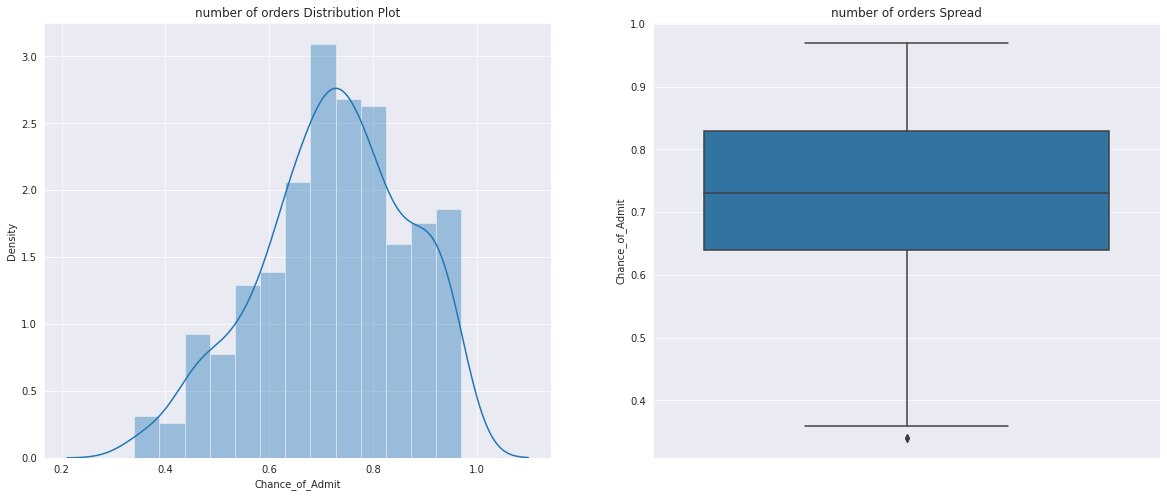

In [50]:
#Data Visualization
import seaborn as sb
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
sb.set_style('darkgrid')
plt.subplot(1,2,1)
plt.title('number of orders Distribution Plot')
sb.distplot(data.Chance_of_Admit)

plt.subplot(1,2,2)
plt.title('number of orders Spread')
sb.boxplot(y=data.Chance_of_Admit)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


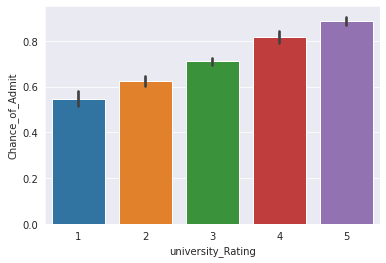

In [51]:
sb.barplot(data.university_Rating,data.Chance_of_Admit)

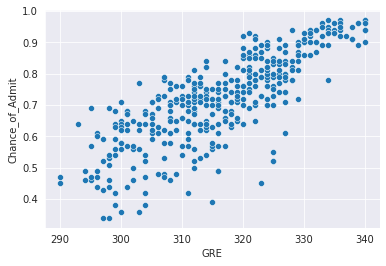

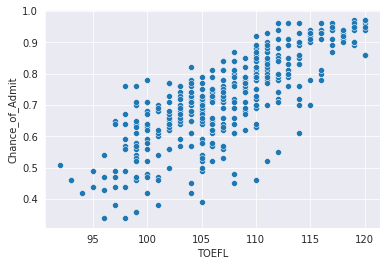

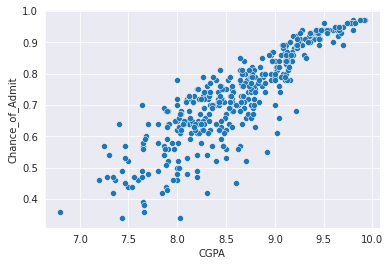

In [52]:
sb.scatterplot(x=data.GRE,y=data.Chance_of_Admit)
plt.show()
sb.scatterplot(x=data.TOEFL,y=data.Chance_of_Admit)
plt.show()
sb.scatterplot(x=data.CGPA,y=data.Chance_of_Admit)

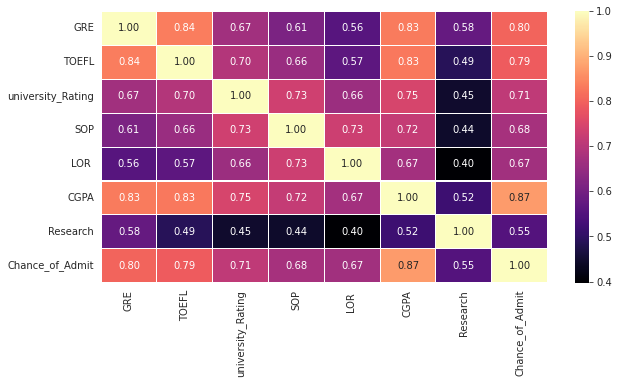

In [53]:
#Correlation Graph
plt.figure(figsize=(10,5))
cr = data.corr()
sb.heatmap(cr, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

In [54]:
#Assigning all columns values except chance of admit to x and chance of admit to y.
x = data.iloc[:, :-1].values
y = data.iloc[:, 7].values

In [ ]:
'''#Feature Encoding
from sklearn.preprocessing import LabelEncoder
y[:] = LabelEncoder().fit_transform(y[:])'''

In [56]:
#Splitting of Data into train and test (25% and 75% respectively)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [ ]:
X_train

In [58]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train

In [104]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [110]:
#Initializing ANN
classifier = Sequential()
#Input layer and hidden layer
classifier.add(Dense(units = 4,activation='relu',kernel_initializer='uniform',input_dim=7))
#Second Hidden Layer
classifier.add(Dense(units = 2, activation = 'relu', kernel_initializer = 'uniform'))
#Output Layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
#Compile ANN
classifier.compile(optimizer=Adam(), loss='mean_squared_error')

In [106]:
classifier.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 4)                 32        
_________________________________________________________________
dense_19 (Dense)             (None, 2)                 10        
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 3         
Total params: 45
Trainable params: 45
Non-trainable params: 0
_________________________________________________________________


In [ ]:
!pip install ann_visualizer
from ann_visualizer.visualize import ann_viz
ann_viz(classifier,view=True,filename='admission.gv', title="admission")
# A admission.gv.pdf file is created to visualize the neurons of our ANN model

In [111]:
classifier.fit(X_train, y_train,batch_size=10, epochs = 100)

Epoch 1/100
30/30 [==============================] - 0s 1ms/step - loss: 0.0699
Epoch 2/100
30/30 [==============================] - 0s 1ms/step - loss: 0.0662
Epoch 3/100
30/30 [==============================] - 0s 998us/step - loss: 0.0619
Epoch 4/100
30/30 [==============================] - 0s 1ms/step - loss: 0.0568
Epoch 5/100
30/30 [==============================] - 0s 997us/step - loss: 0.0505
Epoch 6/100
30/30 [==============================] - 0s 1ms/step - loss: 0.0435
Epoch 7/100
30/30 [==============================] - 0s 1ms/step - loss: 0.0357
Epoch 8/100
30/30 [==============================] - 0s 1ms/step - loss: 0.0280
Epoch 9/100
30/30 [==============================] - 0s 1ms/step - loss: 0.0213
Epoch 10/100
30/30 [==============================] - 0s 1ms/step - loss: 0.0158
Epoch 11/100
30/30 [==============================] - 0s 1ms/step - loss: 0.0119
Epoch 12/100
30/30 [==============================] - 0s 1ms/step - loss: 0.0092
Epoch 13/100
30/30 [=============

In [112]:
y_prediction = classifier.predict(X_test)

In [113]:
y_prediction

array([[0.6636438 ],
       [0.88243544],
       [0.6165722 ],
       [0.6795457 ],
       [0.6408784 ],
       [0.6795457 ],
       [0.6795457 ],
       [0.920487  ],
       [0.73295534],
       [0.80485696],
       [0.60478705],
       [0.6449486 ],
       [0.8028415 ],
       [0.887572  ],
       [0.6795457 ],
       [0.69771844],
       [0.8847343 ],
       [0.7278353 ],
       [0.6795457 ],
       [0.9065544 ],
       [0.6462316 ],
       [0.6309867 ],
       [0.536205  ],
       [0.679096  ],
       [0.6986246 ],
       [0.6823631 ],
       [0.5848292 ],
       [0.8997934 ],
       [0.7892478 ],
       [0.8870041 ],
       [0.6425569 ],
       [0.9039953 ],
       [0.6795457 ],
       [0.8647843 ],
       [0.6647279 ],
       [0.8627858 ],
       [0.6795457 ],
       [0.8656561 ],
       [0.6795457 ],
       [0.6795457 ],
       [0.5307941 ],
       [0.55389684],
       [0.50144434],
       [0.6795457 ],
       [0.6795457 ],
       [0.5123485 ],
       [0.6324366 ],
       [0.628

In [114]:
y_prediction = [round(y_prediction[i][0],2) for i in range(len(y_prediction))]

In [115]:
y_pred = np.array(y_prediction)

In [96]:
y_test_conv = np.float32(y_test)

In [116]:
y_pred

array([0.66, 0.88, 0.62, 0.68, 0.64, 0.68, 0.68, 0.92, 0.73, 0.8 , 0.6 ,
       0.64, 0.8 , 0.89, 0.68, 0.7 , 0.88, 0.73, 0.68, 0.91, 0.65, 0.63,
       0.54, 0.68, 0.7 , 0.68, 0.58, 0.9 , 0.79, 0.89, 0.64, 0.9 , 0.68,
       0.86, 0.66, 0.86, 0.68, 0.87, 0.68, 0.68, 0.53, 0.55, 0.5 , 0.68,
       0.68, 0.51, 0.63, 0.63, 0.58, 0.68, 0.92, 0.51, 0.89, 0.75, 0.58,
       0.68, 0.73, 0.81, 0.67, 0.87, 0.64, 0.68, 0.7 , 0.69, 0.68, 0.54,
       0.49, 0.85, 0.68, 0.68, 0.9 , 0.86, 0.91, 0.93, 0.5 , 0.67, 0.73,
       0.65, 0.88, 0.68, 0.68, 0.81, 0.87, 0.64, 0.9 , 0.8 , 0.67, 0.63,
       0.81, 0.92, 0.84, 0.76, 0.87, 0.67, 0.86, 0.66, 0.75, 0.59, 0.59,
       0.91], dtype=float32)

In [120]:
error_rate = classifier.evaluate(X_test,y_pred)
error_rate

4/4 [==============================] - 0s 3ms/step - loss: 7.7035e-06


7.703529263380915e-06

In [ ]:
'''
Confusion matrix can't be used as the error says "continous type is not valid".

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)'''

In [100]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

print("RMSE score on the test set:",sqrt(mean_squared_error(y_test, y_prediction)))
print("R2 score on the test set:",r2_score(y_test, y_prediction)*100)

RMSE score on the test set: 0.07185401772114877
R2 score on the test set: 76.39209218437321


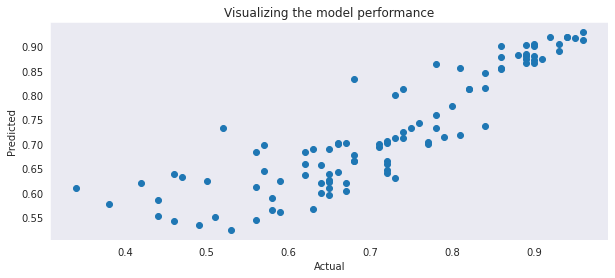

In [69]:
plt.figure(figsize=(10,4))
sb.set_style('darkgrid')
plt.scatter(y_test,y_prediction)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Visualizing the model performance')
plt.grid()

In [122]:
classifier.save("Chance_of_admission.h5")